<a href="https://colab.research.google.com/github/fix27/Colab-Store/blob/main/Mandelbrot_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time taken: 3.3197999000549316


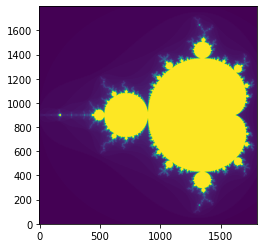

In [7]:
from numpy import *
from pylab import *
import time
def mandel(n, m, itermax, xmin, xmax, ymin, ymax):

    ''' 
    (n, m) are the output image dimensions
    itermax is the maximum number of iterations to do
    xmin, xmax, ymin, ymax specify the region of the
    set to compute.
    '''

    ix, iy = mgrid[0:n, 0:m]
    x = linspace(xmin, xmax, n)[ix]
    y = linspace(ymin, ymax, m)[iy]
    c = x+complex(0,1)*y
    del x, y
    img = zeros(c.shape, dtype=int)
    ix.shape = n*m
    iy.shape = n*m
    c.shape = n*m
    z = copy(c)
    for i in range(itermax):
        if not len(z):
            break
        multiply(z, z, z)
        add(z, c, z)
        rem = abs(z)>2.0
        img[ix[rem], iy[rem]] = i+1
        rem = ~ rem
        z = z[rem]
        ix, iy = ix[rem], iy[rem]
        c = c[rem]
    return img



start = time.time()
I = mandel(2000, 2000, 100, -2, .5, -1.25, 1.25)
print ('Time taken:', time.time()-start)
I[I==0] = 101
img = imshow(I.T, origin='lower left')
img.write_png('mandel.png')
show()